In [38]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [28]:
from KMeans import KMeans

In [3]:
from evaluation import calculate_silhouette_score, calculate_silhouette_samples

In [17]:
from hyperparameters import clusters, initialization_methods

In [8]:
scaled_df = pd.read_csv("Scaled_Dataset.csv")
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalAcceptedCmp
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.09552,2.375425,1.973583,-1.349603,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-0.43916
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.09552,-0.420977,-1.665144,-1.349603,1.274785,-0.963297,1.404572,0.449070,0.632456,-0.43916
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.09552,-0.420977,-0.172664,0.740959,0.334530,0.280110,-1.264598,-0.654644,-1.581139,-0.43916
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.09552,-0.420977,-1.923210,0.740959,-1.289547,-0.920135,0.069987,0.449070,0.632456,-0.43916
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.09552,-0.420977,-0.822130,0.740959,-1.033114,-0.307562,0.069987,0.449070,0.632456,-0.43916


In [9]:
scaled_np = scaled_df.to_numpy()

In [55]:
score_dict = {"init_method": [],
              "clusters": [],
              "score": [] }

Optimial point reached after 12 iterations
cluster labels are:  [1 0 1 ... 1 1 0]
For n_clusters = 2 And init method = kmeans++ The average silhouette_score is : 0.2594302003430735
Optimial point reached after 10 iterations
cluster labels are:  [0 1 0 ... 0 0 1]
For n_clusters = 2 And init method = random The average silhouette_score is : 0.2592511947916727
Optimial point reached after 10 iterations
cluster labels are:  [2 0 2 ... 2 1 0]
For n_clusters = 3 And init method = kmeans++ The average silhouette_score is : 0.19327884254897743
Optimial point reached after 18 iterations
cluster labels are:  [0 2 0 ... 0 1 2]
For n_clusters = 3 And init method = random The average silhouette_score is : 0.19165236360924312
Optimial point reached after 12 iterations
cluster labels are:  [0 1 0 ... 0 3 1]
For n_clusters = 4 And init method = kmeans++ The average silhouette_score is : 0.1728687227045024
Optimial point reached after 13 iterations
cluster labels are:  [3 1 3 ... 3 0 1]
For n_clusters 

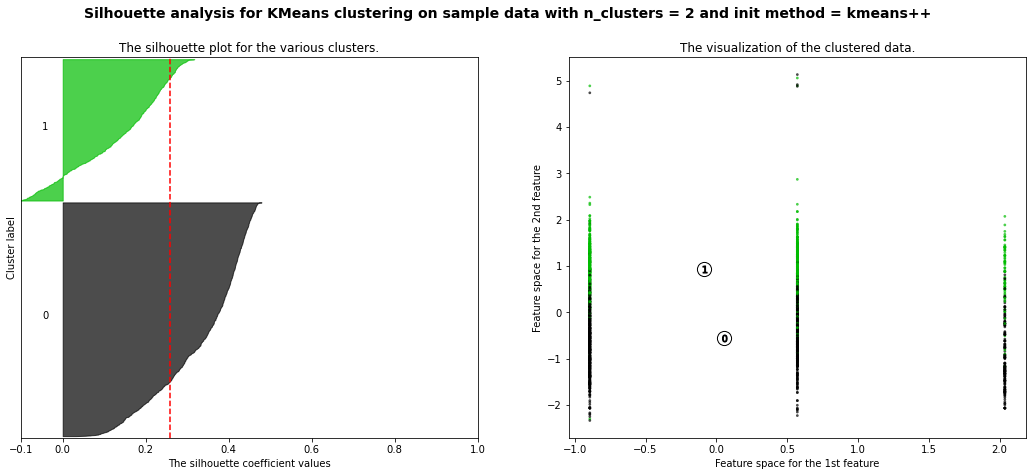

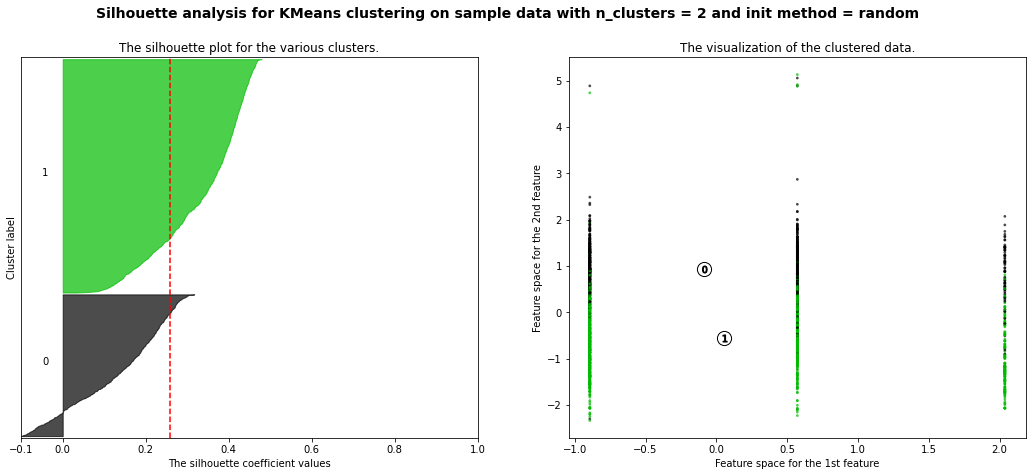

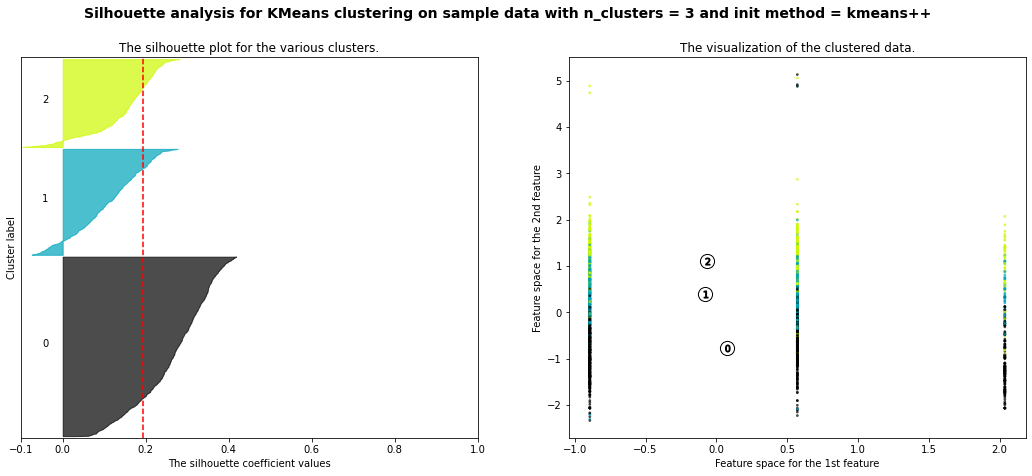

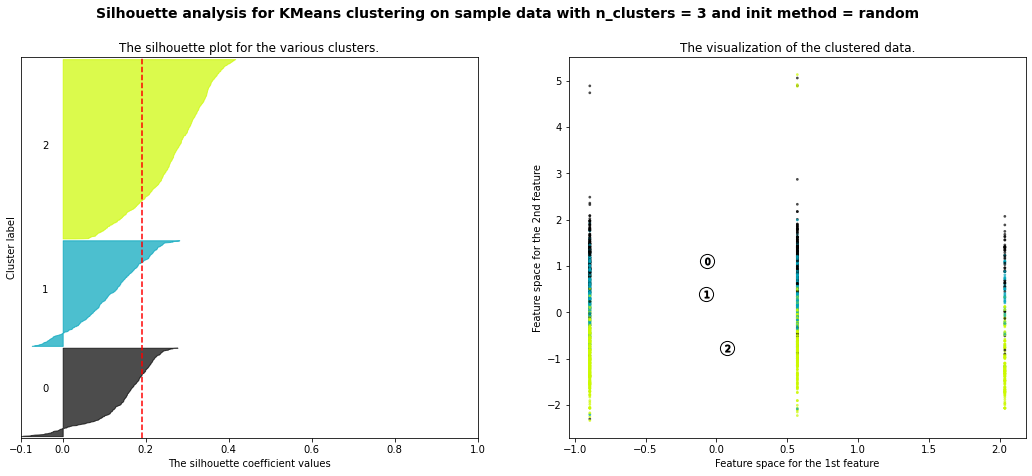

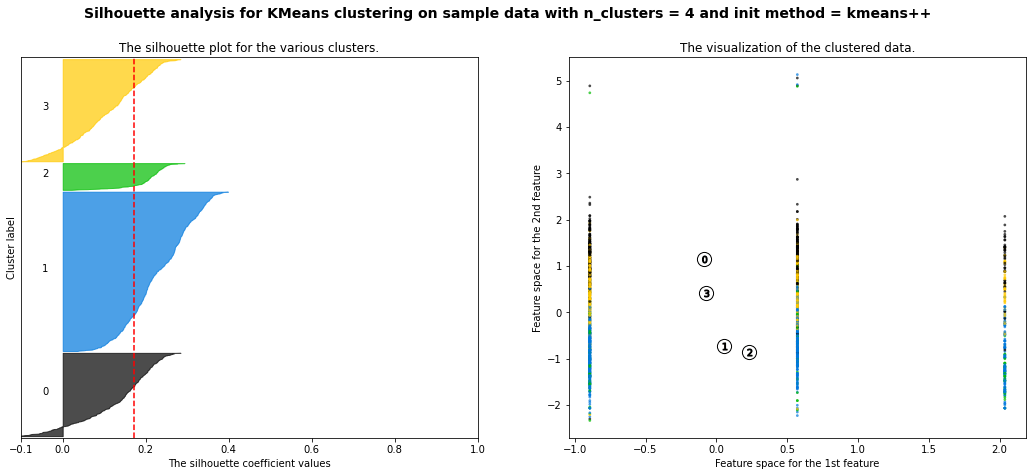

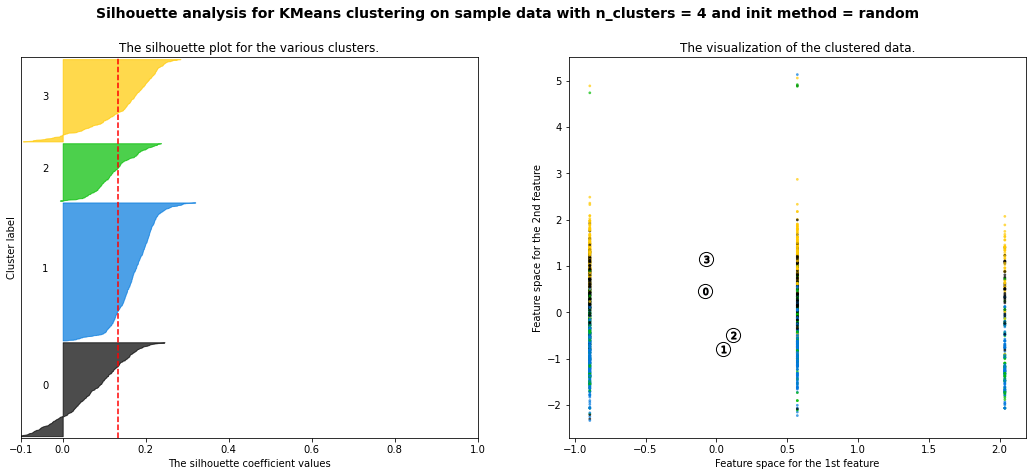

In [56]:
for n_clusters in clusters:
    for init in initialization_methods:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(scaled_np) + (n_clusters + 1) * 10])
        kmeans = KMeans(n_centers=n_clusters, init=init, max_itr=1000)
        kmeans.fit(scaled_np)
        kmeans.converge()
        cluster_labels = kmeans.data_cluster
        print("cluster labels are: ", cluster_labels)
        
        silhouette_avg = calculate_silhouette_score(scaled_np, cluster_labels)
        
        score_dict["init_method"].append(init)
        score_dict["clusters"].append(n_clusters)
        score_dict["score"].append(silhouette_avg)
        
        print(
            "For n_clusters =",
            n_clusters,
            "And init method =",
            init,
            "The average silhouette_score is :",
            silhouette_avg,
        )
        
        sample_silhouette_values = calculate_silhouette_samples(scaled_np, cluster_labels)
        
        y_lower = 10
        
        for i in range(n_clusters):
      
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10 
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            scaled_np[:, 0], scaled_np[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        centers = kmeans.centers

        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle(
                "Silhouette analysis for KMeans clustering on sample data with n_clusters = {} and init method = {}".format(n_clusters, init),
                fontsize=14,
                fontweight="bold",
            )
        
plt.show()

In [59]:
score_df = pd.DataFrame.from_dict(score_dict)
score_df

,init_method,clusters,score
0,kmeans++,2,0.259430
1,random,2,0.259251
2,kmeans++,3,0.193279
3,random,3,0.191652
4,kmeans++,4,0.172869
5,random,4,0.133027


<AxesSubplot:xlabel='clusters'>

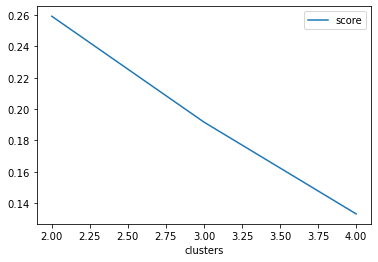

In [67]:
score_df[score_df["init_method"] == "random"].plot(x="clusters", y="score")

<AxesSubplot:xlabel='clusters'>

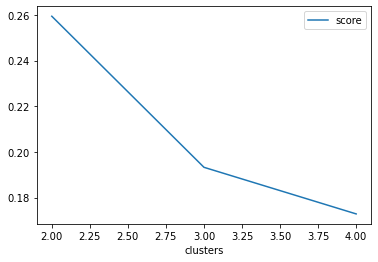

In [68]:
score_df[score_df["init_method"] == "kmeans++"].plot(x="clusters", y="score")